# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

Stumpy Tutorial Time Series Chains:
https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

Matrix Profile VII: Time Series Chains:
https://sites.google.com/site/timeserieschain/

Robust Time Series Chain Discovery with Incremental Nearest Neighbors:
https://sites.google.com/view/robust-time-series-chain-22 

In [1]:
import helper.testdata as testdata
import helper.utils as utils
import helper.calculate as calculate
import helper.visualize as visualize

# --> Results (Paper vs. Here) are different (no dilation)! #
with the snippet dataset from Robust Time Series Chain Discovery with Incremental Nearest Neighbors (see chains_tilttable.ipynb), the results are the same.

## TiltABP_210_25000 Data (MP VII) ##
The arterial blood pressure (ABP) signal of a patient lying on a tilt table.

m = 180, length of a cardiac cycle (Robust Time Series Chain Discovery with Incremental Nearest Neighbors) --> Results (Paper vs. Here) are different (no dilation)!

m = 200 (MP VII) --> Results (Paper vs. Here) are different (no dilation)!

m = 205 (own testing) --> Results (Paper vs. Here) are the same(?)

In [2]:
# Parameter
use_case = "chains"
data_name = "tilttable"
T = testdata.load_from_txt("../data/" + use_case + "/" + data_name + ".txt")
ground_truth = None # if ground_truth=None, the ground_truth is set to the unanchored chain without dilation

### Experiments ###

In [3]:
# Hyperparameter
target_w = 205
offset = False
max_dilation = utils.calculate_max_dilation_size(target_w)

print("Dilation Sizes:", [i for i in range(1, max_dilation+1)])

Dilation Sizes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [4]:
# calculate
calculate.chains(T, max_dilation, target_w, data_name, use_case, ground_truth, offset)

1
Calculated MP for: w=205, m=205, d=1, offset=0
2
Calculated MP for: w=205, m=103, d=2, offset=0
3
Calculated MP for: w=205, m=69, d=3, offset=0
4
Calculated MP for: w=205, m=52, d=4, offset=0
5
Calculated MP for: w=206, m=42, d=5, offset=0
6
Calculated MP for: w=205, m=35, d=6, offset=0
7
Calculated MP for: w=204, m=30, d=7, offset=0
8
Calculated MP for: w=209, m=27, d=8, offset=0
9
Calculated MP for: w=208, m=24, d=9, offset=0
10
Calculated MP for: w=201, m=21, d=10, offset=0
11
Calculated MP for: w=210, m=20, d=11, offset=0
12
Calculated MP for: w=205, m=18, d=12, offset=0
13
Calculated MP for: w=209, m=17, d=13, offset=0
14
Calculated MP for: w=211, m=16, d=14, offset=0


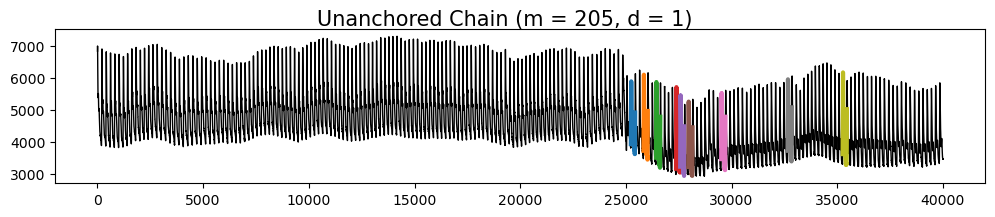

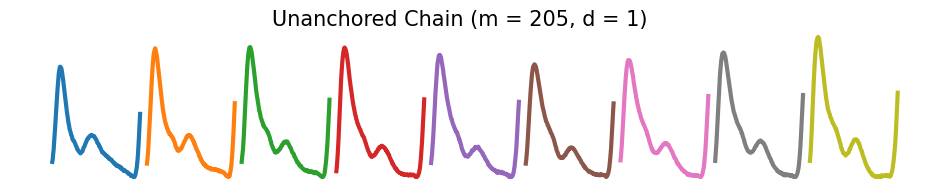

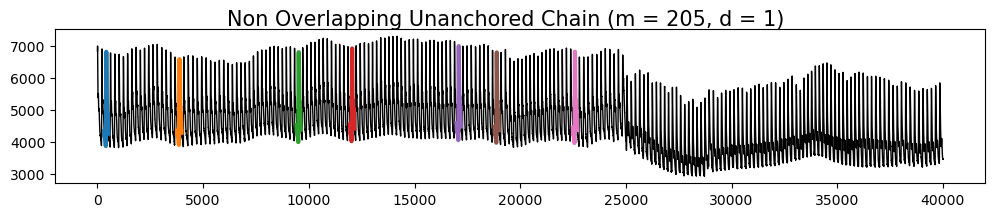

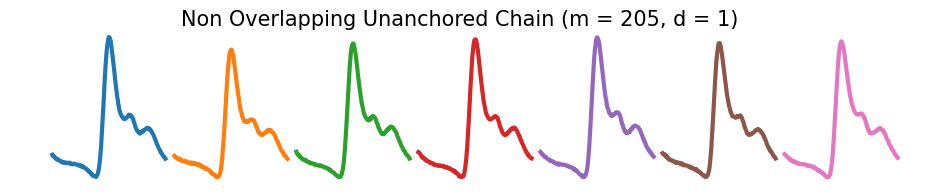

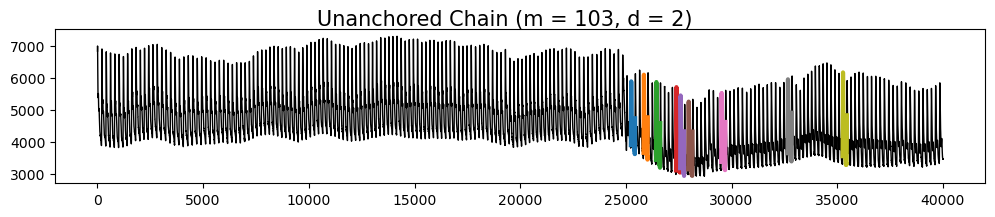

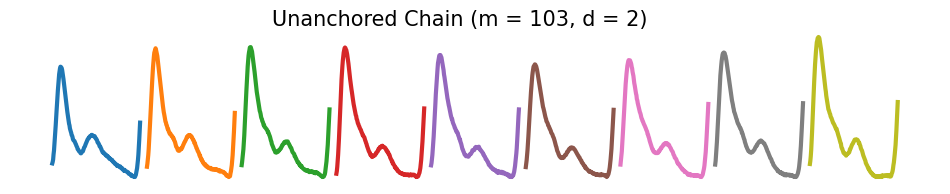

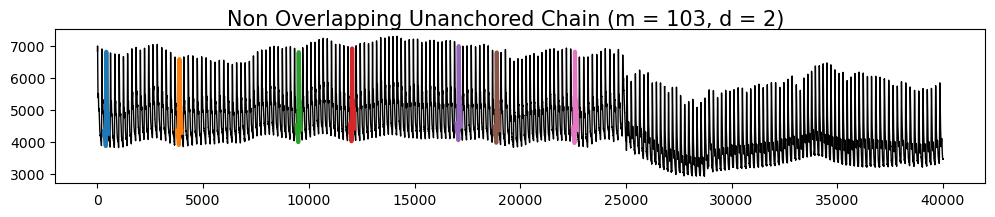

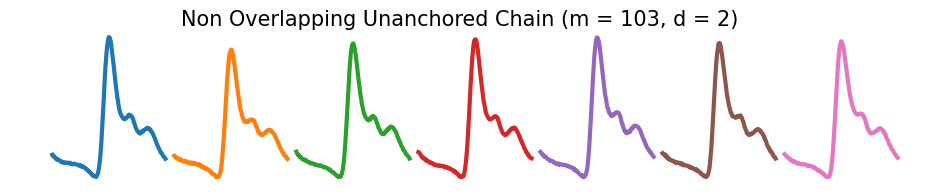

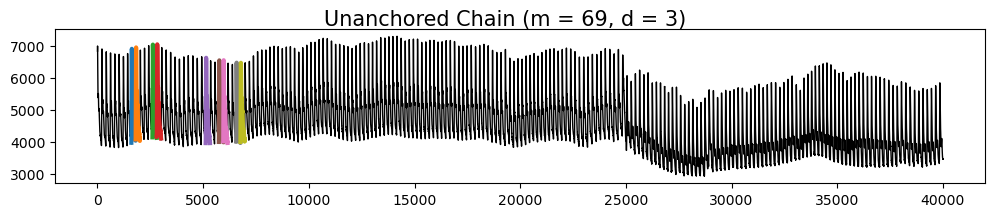

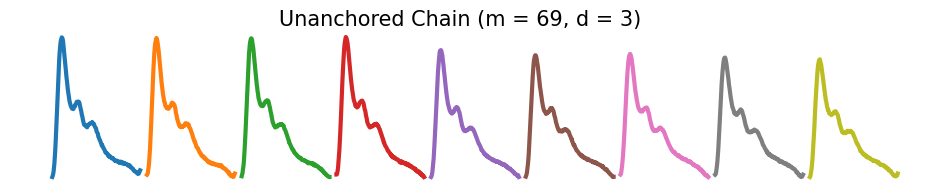

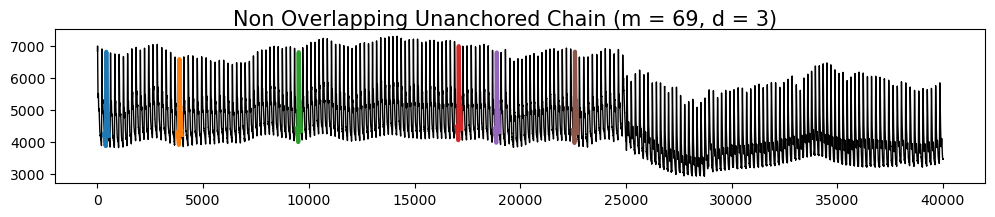

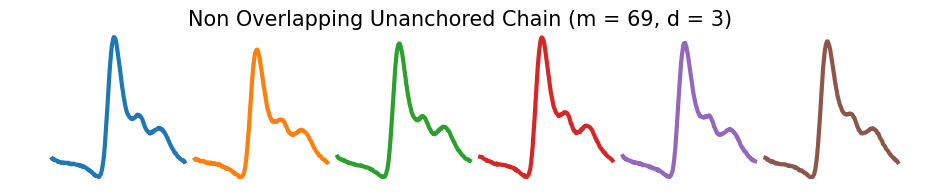

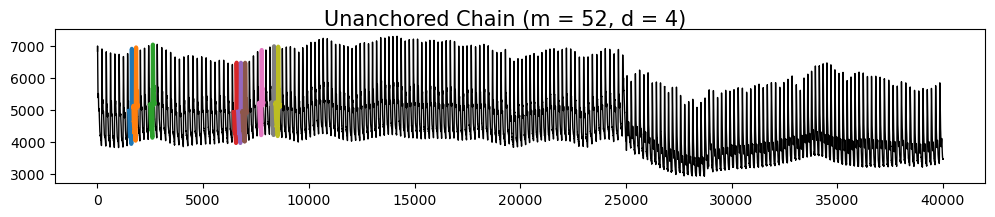

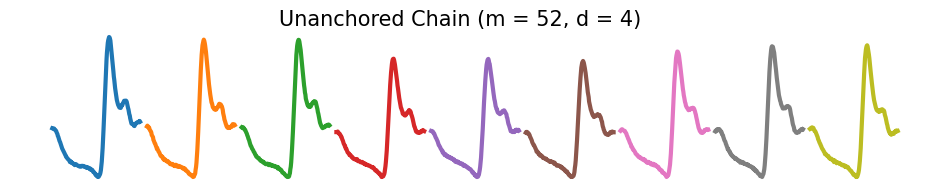

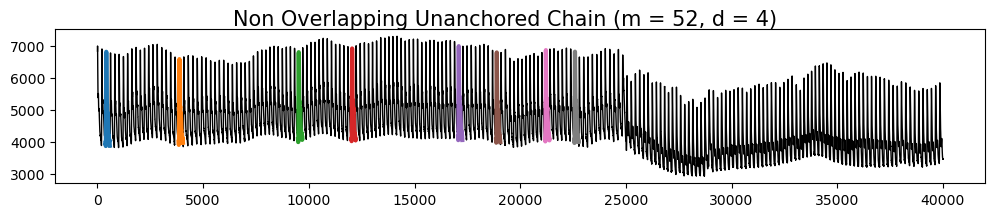

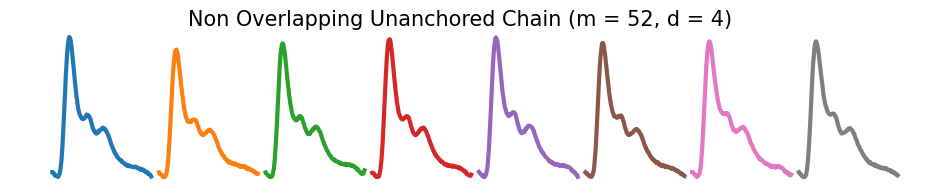

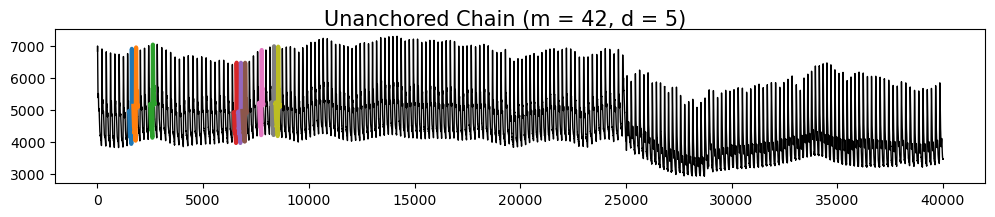

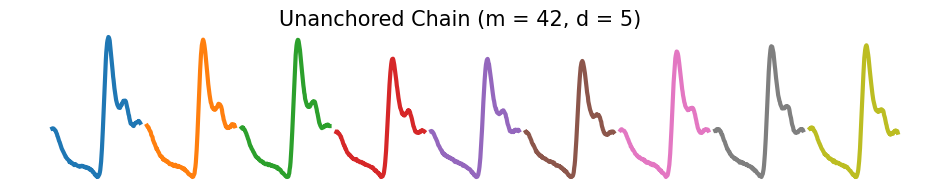

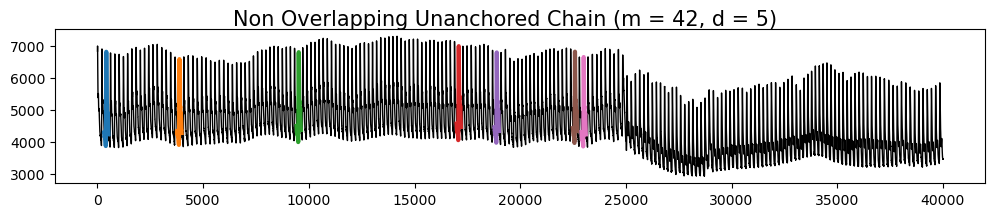

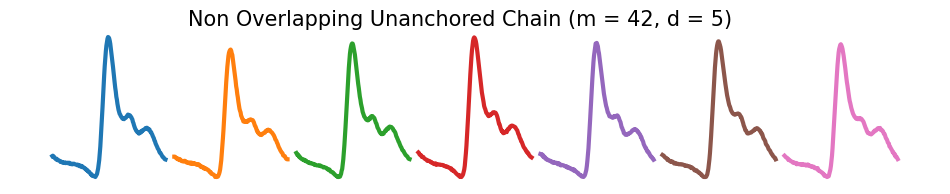

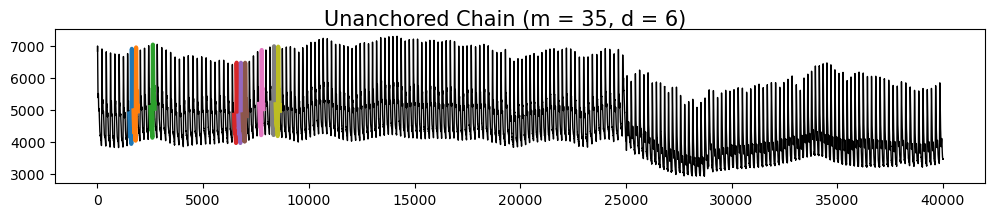

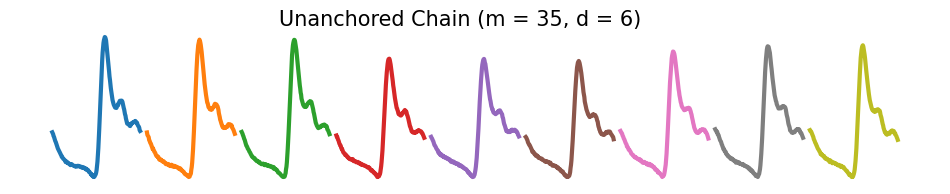

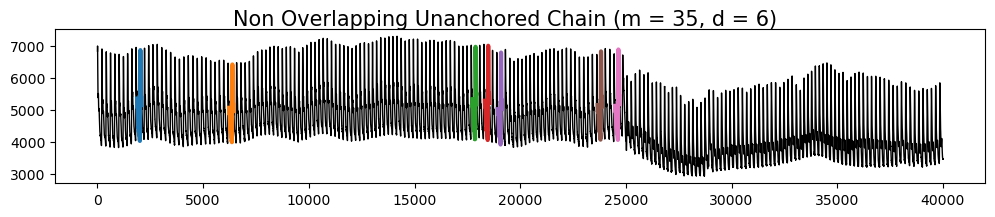

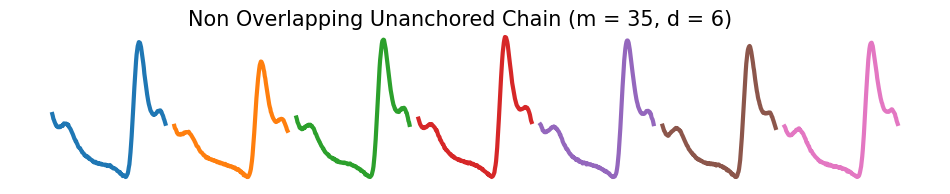

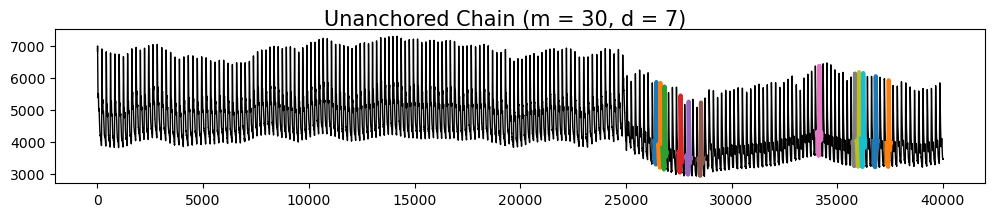

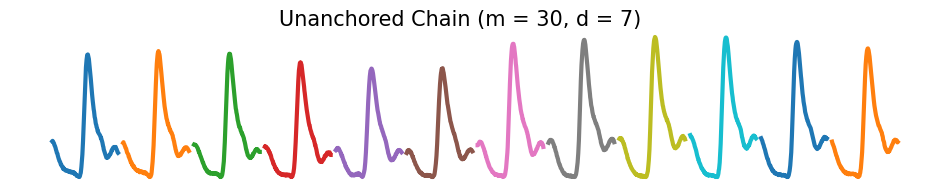

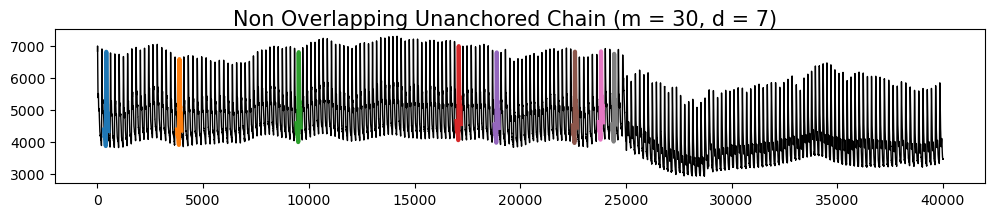

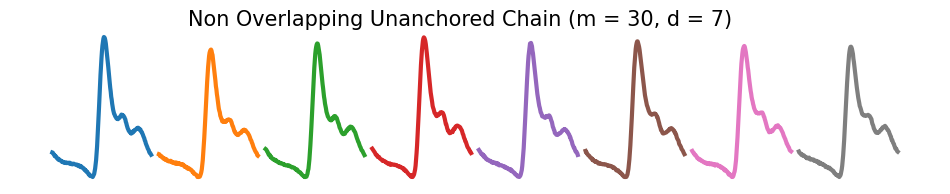

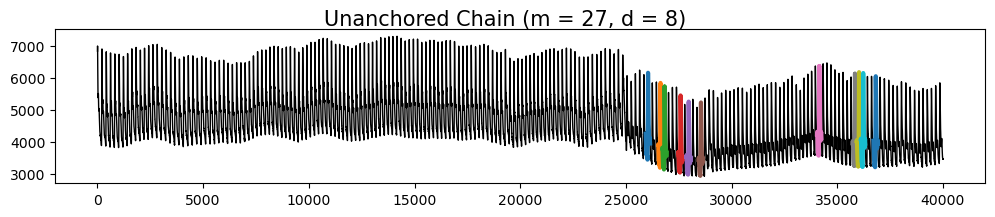

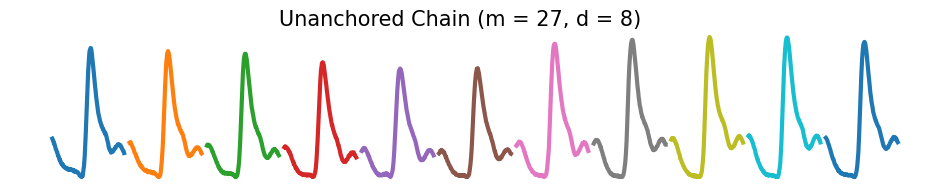

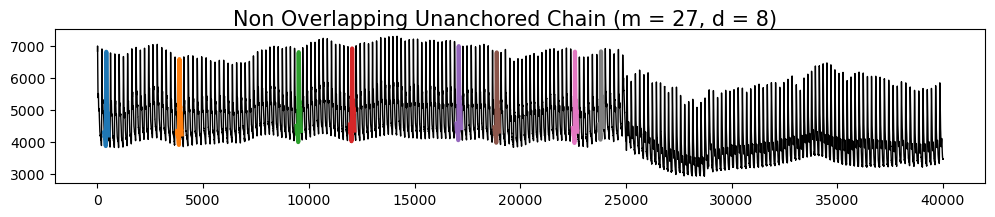

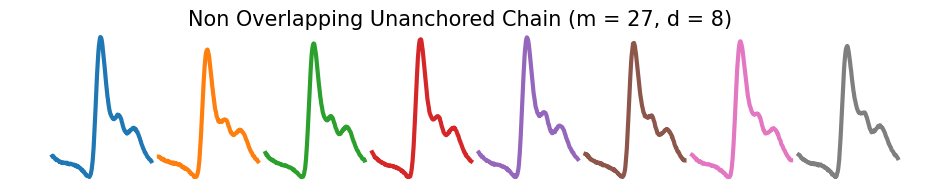

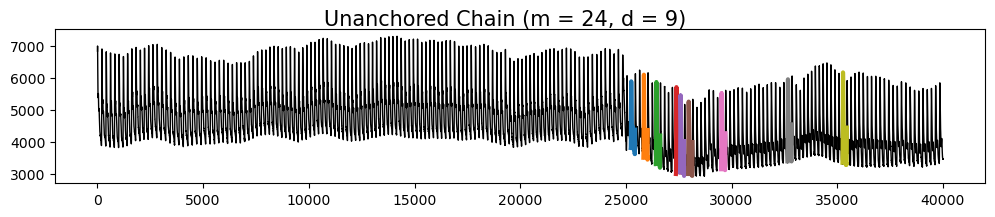

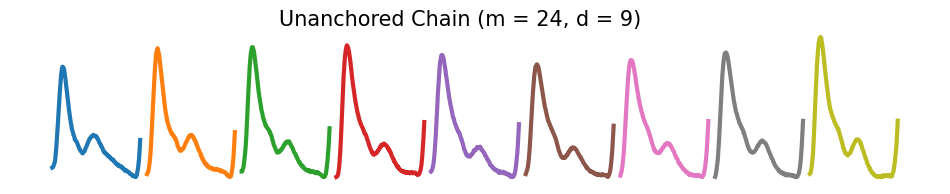

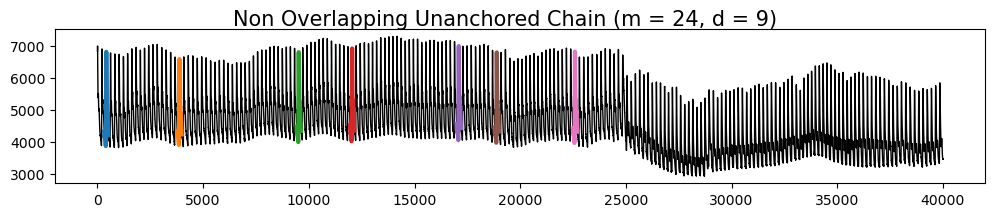

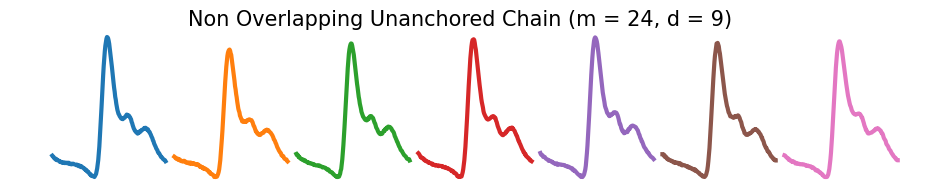

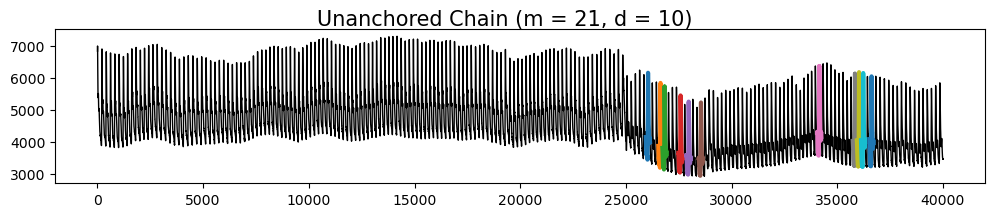

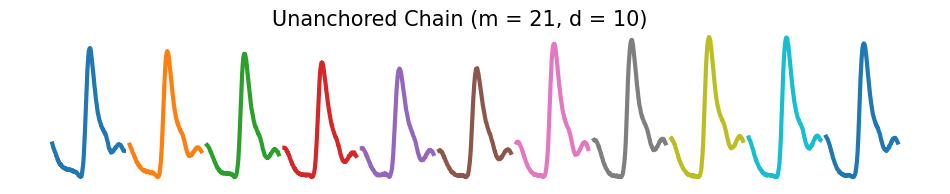

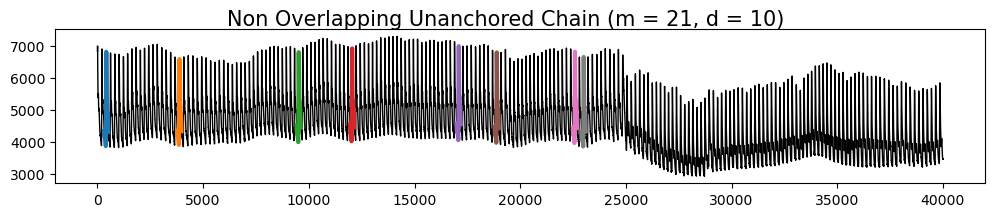

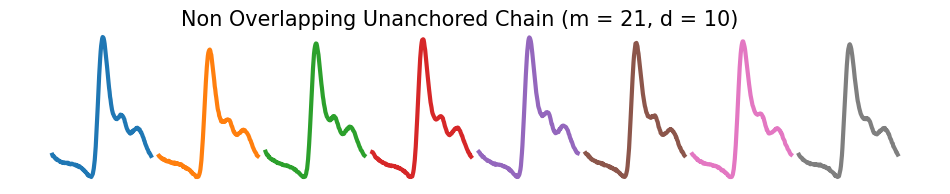

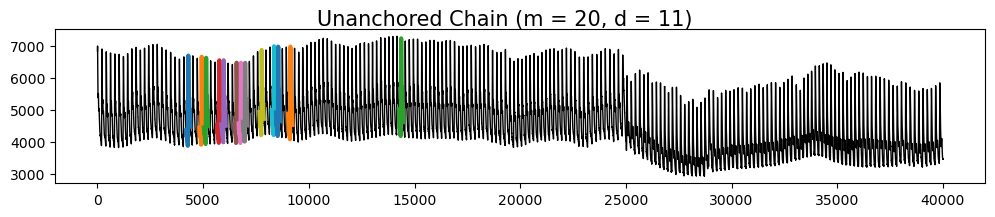

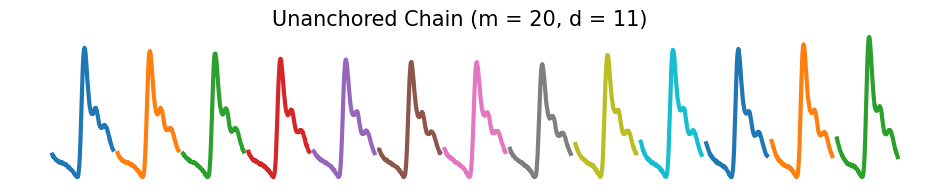

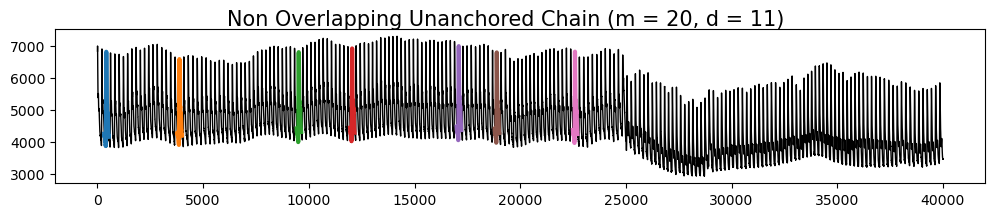

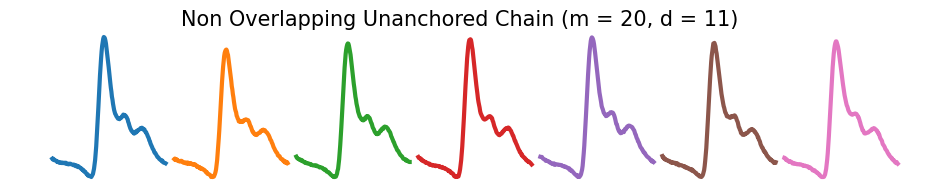

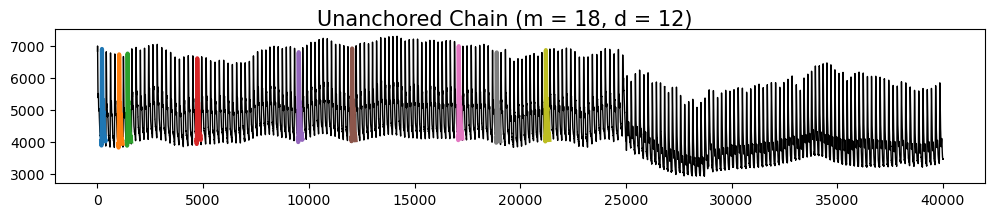

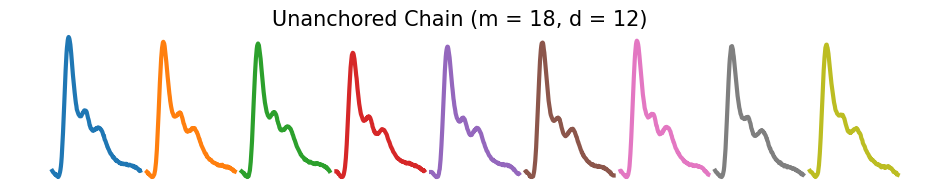

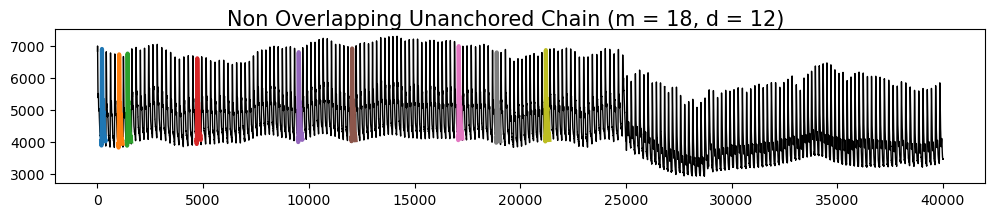

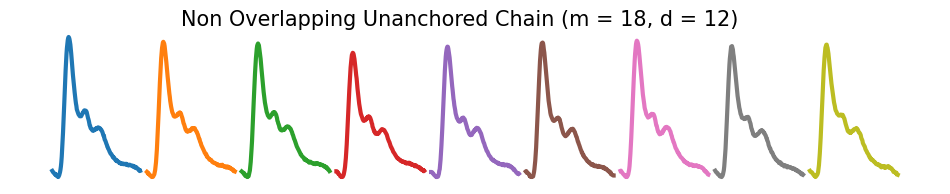

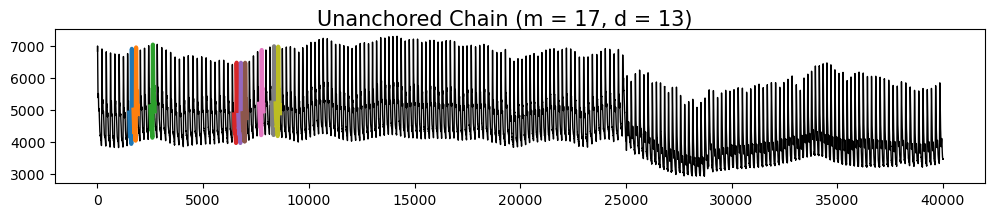

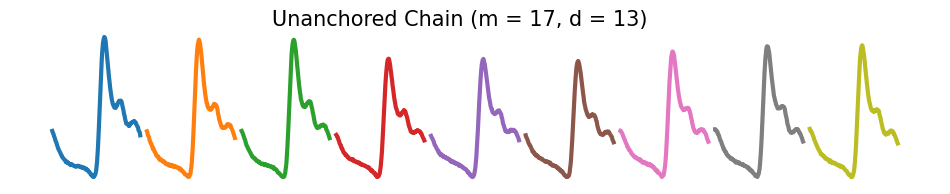

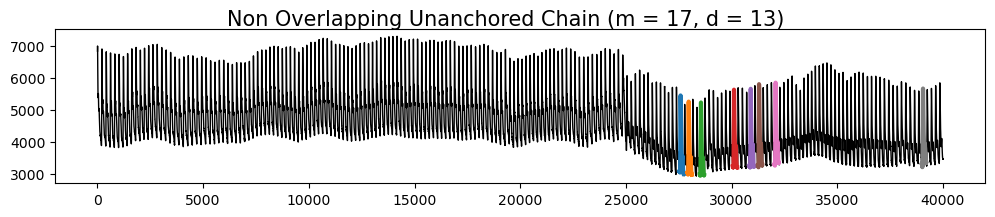

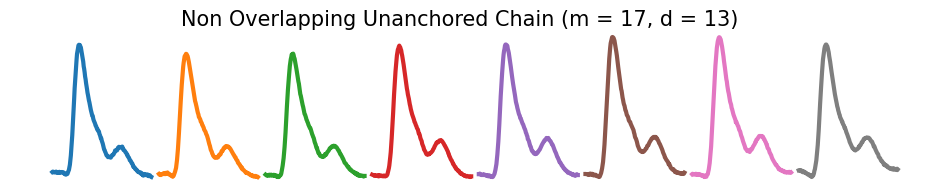

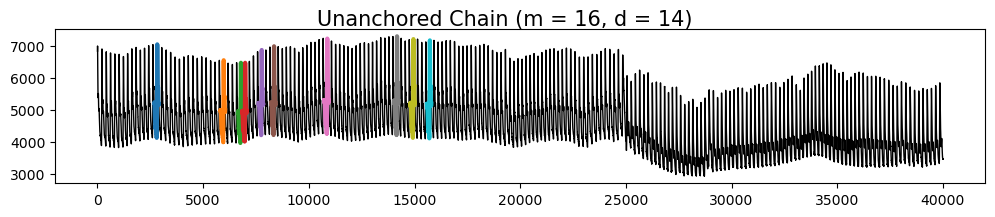

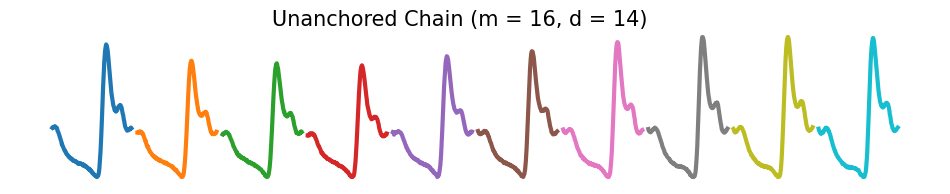

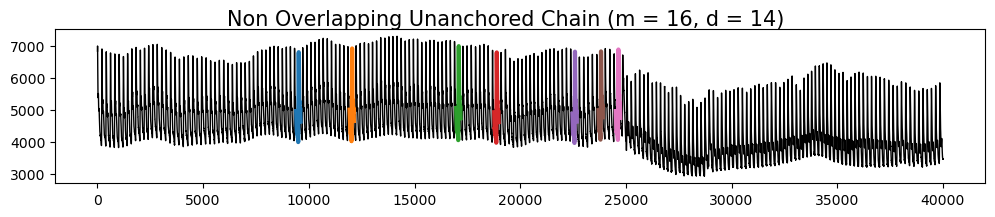

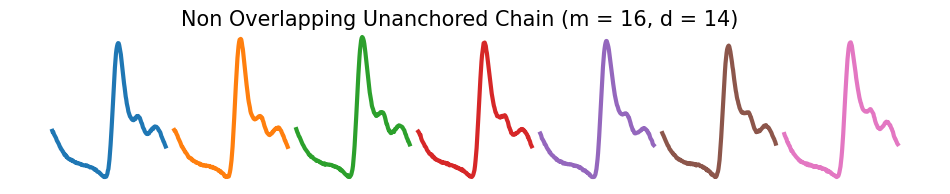

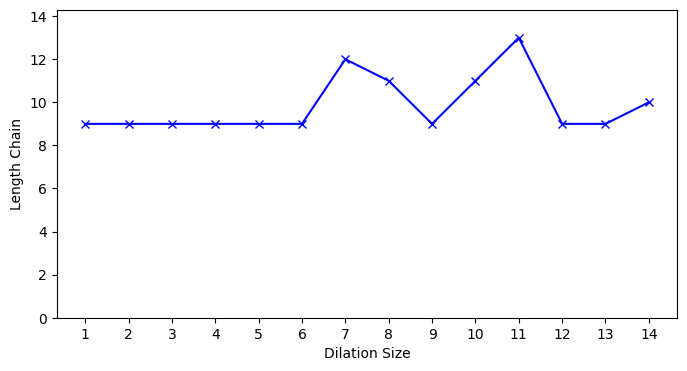

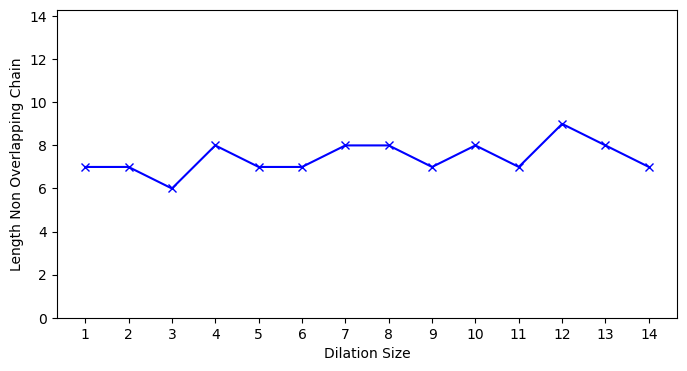

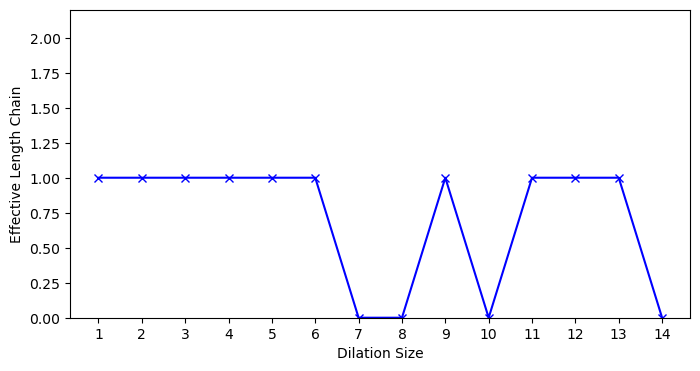

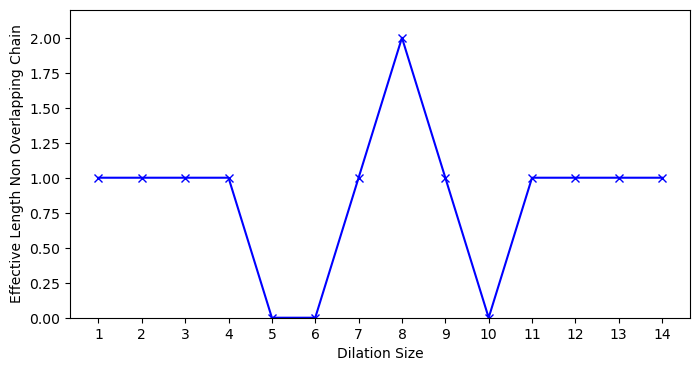

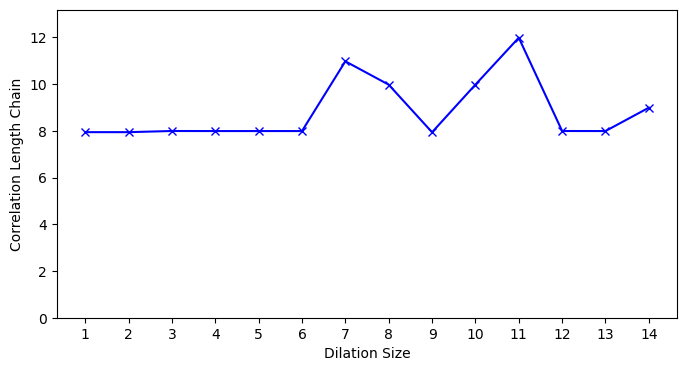

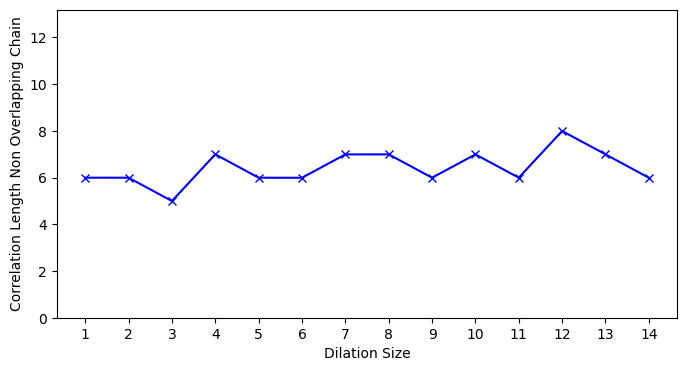

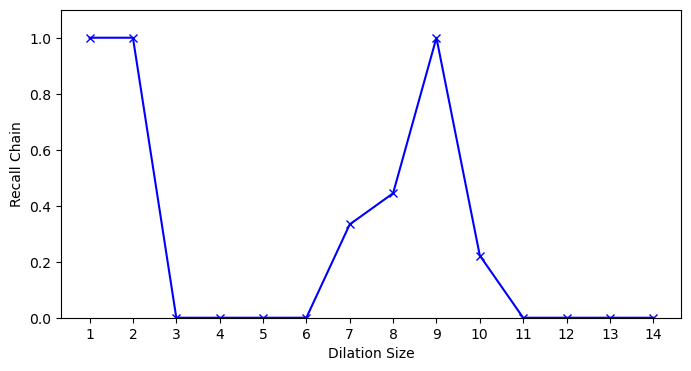

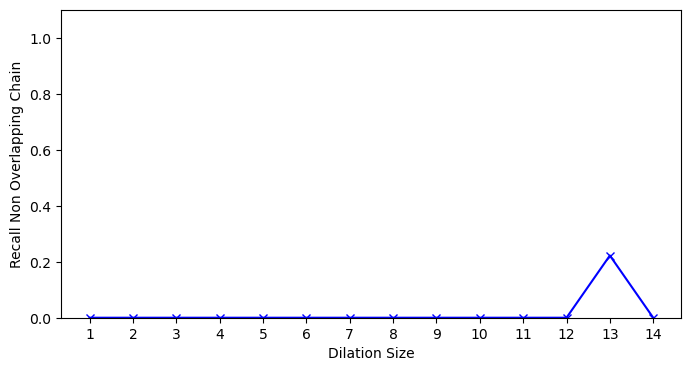

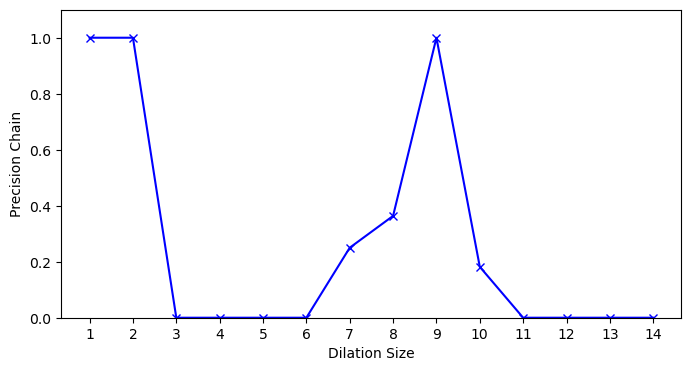

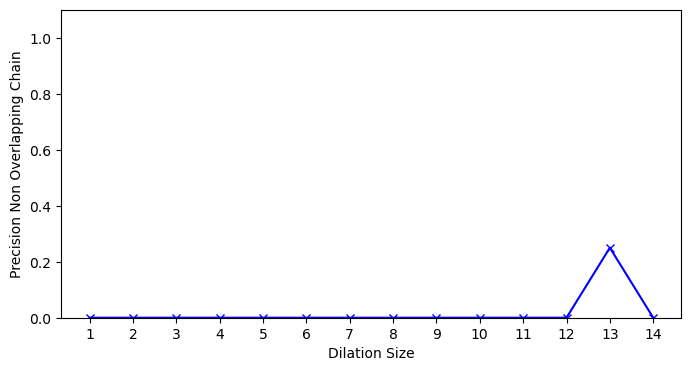

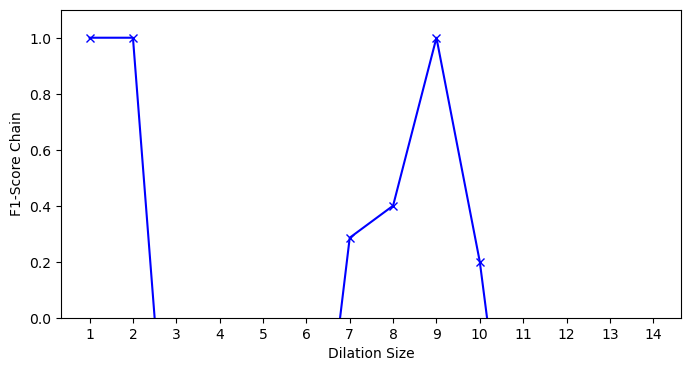

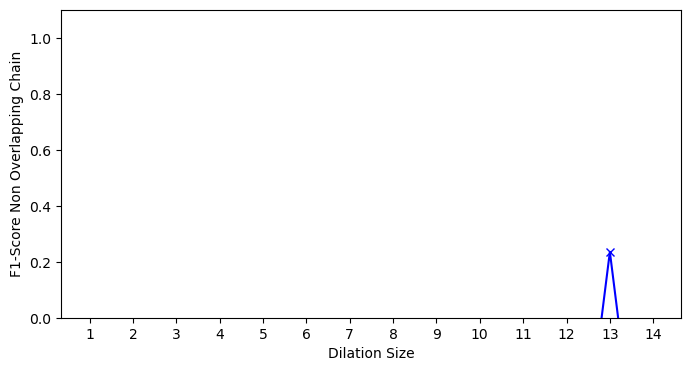

In [10]:
# visualize:
visualize.chains(max_dilation, target_w, data_name, use_case, offset)